In [18]:
import pandas as pd
import seaborn as sns
import yaml
from matplotlib import pyplot as plt

from src.utils import get_path_projeto

In [19]:
# Diretório raiz do projeto
dir_projeto = get_path_projeto()
# Carregando as configs pra carregar o csv
with open(dir_projeto / "config/csv_config.yaml", "r") as config_file:
    config_csv = yaml.safe_load(config_file)
# Carregando os dados
df = pd.read_csv(dir_projeto / "data/raw/2023-11.csv", **config_csv)

df["interval_start_local"] = pd.to_datetime(df["interval_start_local"])
df["interval_end_local"] = pd.to_datetime(df["interval_end_local"])
display(df.head())
df.info()

,interval_start_local,interval_end_local,solar,wind,geothermal,biomass,biogas,small_hydro,coal,nuclear,natural_gas,large_hydro,batteries,imports,other
0,2023-11-01 00:00:00-03:00,2023-11-01 00:05:00-03:00,-53,1005,787,123,169,246,0,1100,15327,2842,1928,3000,0
1,2023-11-01 00:05:00-03:00,2023-11-01 00:10:00-03:00,-52,1015,788,123,169,243,0,1101,15213,2783,2015,3064,0
2,2023-11-01 00:10:00-03:00,2023-11-01 00:15:00-03:00,-52,1024,789,123,168,223,0,1101,15217,2762,1862,3193,0
3,2023-11-01 00:15:00-03:00,2023-11-01 00:20:00-03:00,-52,1036,789,123,169,224,0,1100,15267,2767,1830,3126,0
4,2023-11-01 00:20:00-03:00,2023-11-01 00:25:00-03:00,-52,1051,789,123,169,224,0,1101,15279,2772,1813,3078,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8628 entries, 0 to 8627
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype                    
---  ------                --------------  -----                    
 0   interval_start_local  8628 non-null   datetime64[ns, UTC-03:00]
 1   interval_end_local    8628 non-null   datetime64[ns, UTC-03:00]
 2   solar                 8628 non-null   int64                    
 3   wind                  8628 non-null   int64                    
 4   geothermal            8628 non-null   int64                    
 5   biomass               8628 non-null   int64                    
 6   biogas                8628 non-null   int64                    
 7   small_hydro           8628 non-null   int64                    
 8   coal                  8628 non-null   int64                    
 9   nuclear               8628 non-null   int64                    
 10  natural_gas           8628 non-null   int64                 

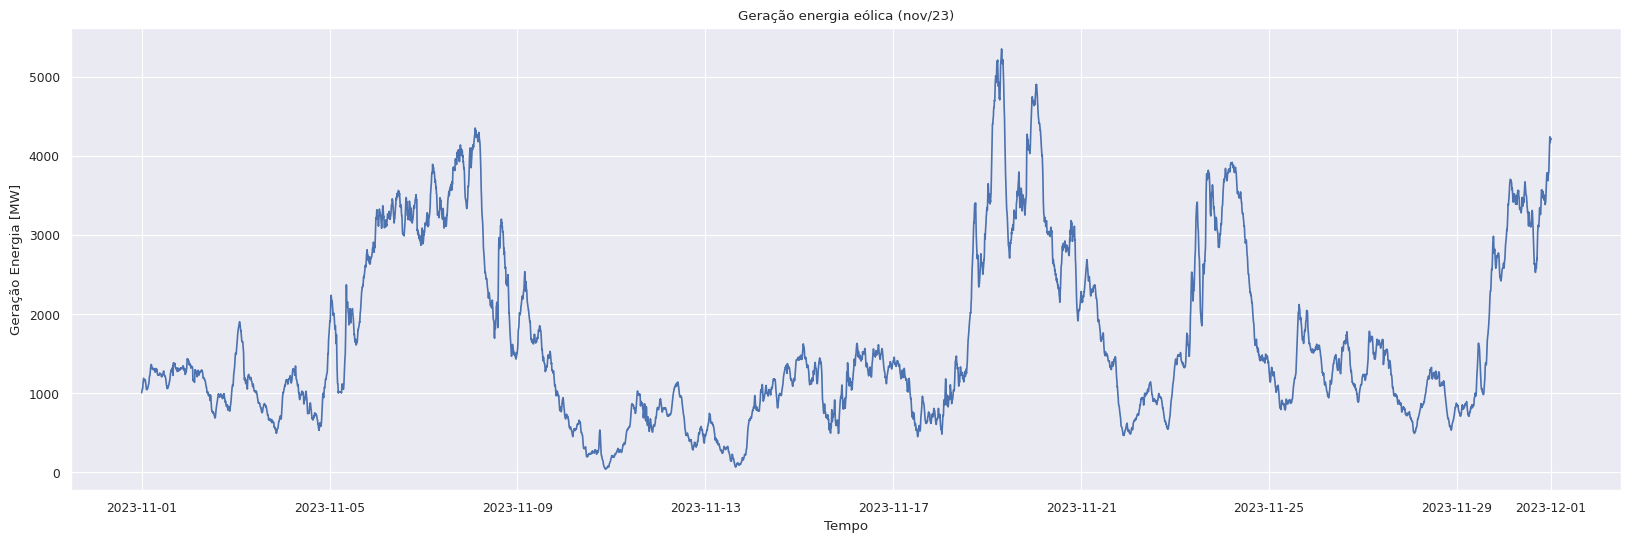

In [16]:
# Visualizando os dados
sns.set_theme("paper")
sns.set_style("darkgrid")

plt.figure(figsize=(20, 6))

sns.lineplot(
    data=df,
    x="interval_start_local",
    y="wind",
)

plt.title("Geração energia eólica (nov/23)")
plt.xlabel("Tempo")
plt.ylabel("Geração Energia [MW]")

plt.show()

In [ ]:
# Empilhando todos os csvs
dfs = [
    pd.read_csv(csv_file, **config_csv) for csv_file in (dir_projeto / "data/raw").rglob("*.csv")
]
df_unico = pd.concat(dfs, ignore_index=True).sort_values(by="interval_start_local").reset_index(drop=True)
# Exportando o csv empilhado
df_unico.to_csv(dir_projeto / "data/staged/dados_empilhados.csv", index=False, **config_csv)

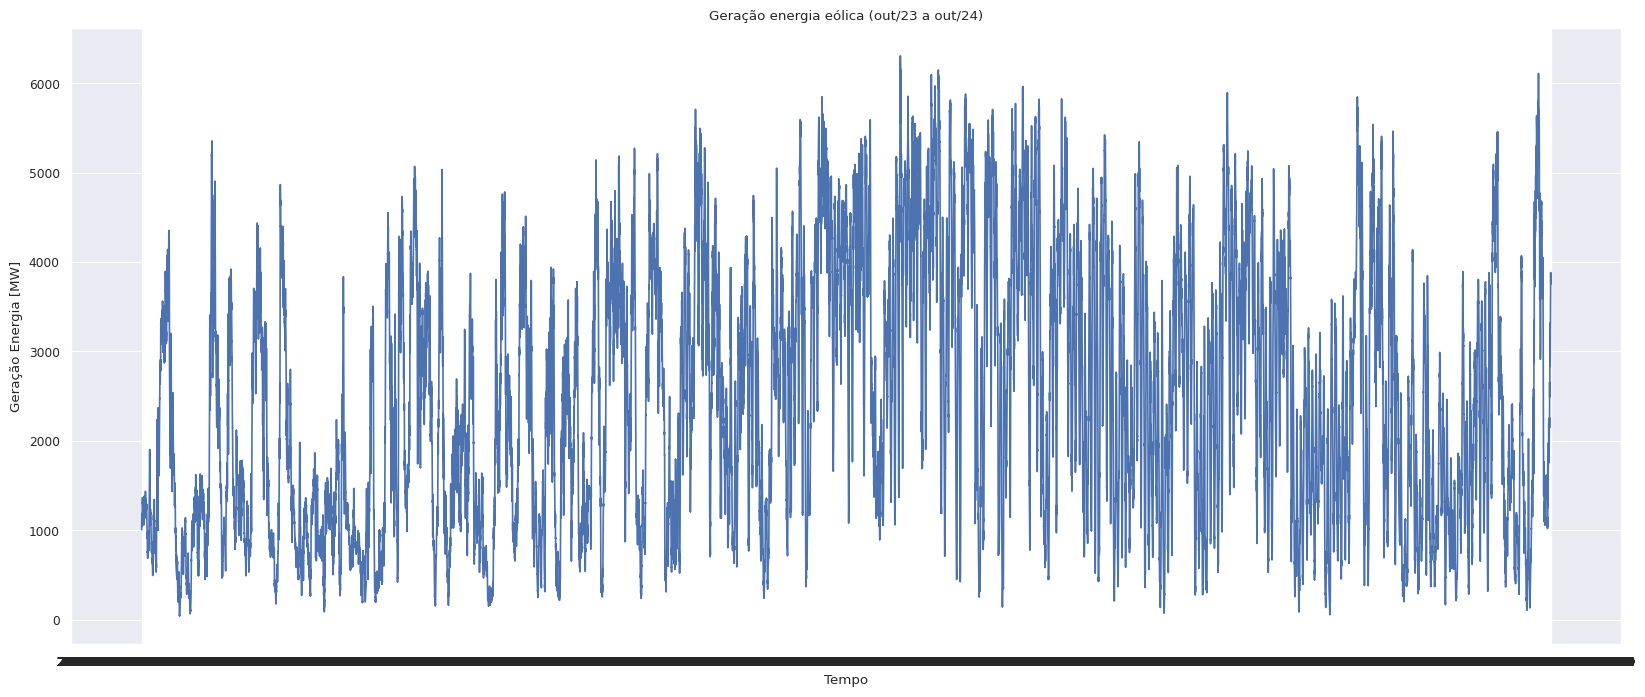

In [17]:
# Visualizando os dados empilhados
sns.set_theme("paper")
sns.set_style("darkgrid")

plt.figure(figsize=(20, 8))

sns.lineplot(
    data=df_unico,
    x="interval_start_local",
    y="wind",
)

plt.title("Geração energia eólica (out/23 a out/24)")
plt.xlabel("Tempo")
plt.ylabel("Geração Energia [MW]")

plt.show()